In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import matplotlib.colors as mcolors
import math

In [9]:
import os
os.chdir('/Users/ngdnh/Codespace/PulsatingPulseShop/')

%config InlineBackend.figure_formats = ['svg']

# Hamiltonian of a transmon

In [2]:
def hamiltonian(Ec, Ej, N, ng):
    '''
        Hamiltonian for the cos2phi qubit
    '''
    m = np.diag(4 * Ec * (np.arange(-N, N + 1) - ng) ** 2) - 0.5 * Ej * (
        np.diag(np.ones(2 * N), 1) + np.diag(np.ones(2 * N), -1)
    )
    return qt.Qobj(m)

In [3]:
def extract_coefficients(eig_state, N, state_idx):

    return np.array([np.real(eig_state[state_idx][i][0]) for i in range(2*N+1)])

In [4]:
N0 = 30
H0 = hamiltonian(Ec=1, Ej=30, N=N0, ng=0)

eig_val, eig_state = H0.eigenstates()

# Eigenstates

In [5]:
range_N = np.arange(-N0, N0+1)

coefficients = [
    # extract the float value of the coefficient of the first 4 states
    extract_coefficients(eig_state, N0, i) for i in range(6)
]

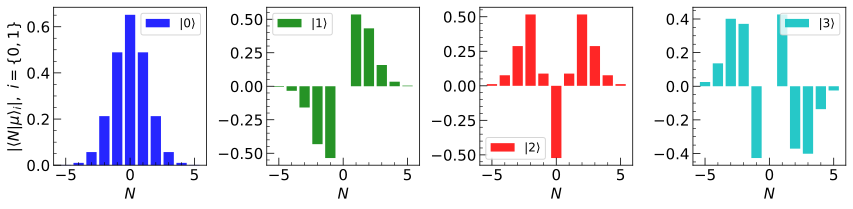

In [10]:
labels = [r'$|0\rangle$', r'$|1\rangle$', r'$|2\rangle$', r'$|3\rangle$']

fig, axes = plt.subplots(ncols=4, figsize=(12, 3))
shrink = 25
colors = [list(mcolors.BASE_COLORS)[i] for i in range(4)]
for ax, coef, color, label in zip(axes, coefficients, colors, labels):
    ax.bar(range_N[shrink:-shrink], coef[shrink:-shrink], color=color, label=label, alpha=0.85)
    ax.set_xlabel(r'$N$', fontsize=15)
    ax.tick_params(axis='both', labelsize=15, direction='in', which='both')
    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', length=7.5)
    ax.tick_params(axis='both', which='minor', length=3)
    ax.legend(fontsize=12)

axes[0].set_ylabel(r'$|\langle N|\mu\rangle_i|,\ i=\{0,1\}$', fontsize=15)

fig.tight_layout()

In [7]:
phi_grid_pts = 100
phi_basis_labels = np.linspace(-np.pi, np.pi, phi_grid_pts)

phi_wavefunc_amplitudes = [
    np.empty(phi_grid_pts, dtype=np.complex128) for _ in range(len(coefficients))
]

def compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts):
    return np.array([
        (1 / math.sqrt(2 * np.pi)) * np.sum(
            coef * np.exp(1j * phi_basis_labels[k] * range_N)
        ) for k in range(phi_grid_pts)
    ])

for i, coef in enumerate(coefficients):
    phi_wavefunc_amplitudes[i] = compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts)

# Overlaid against the Josephson potential

In [46]:
def josephson_potential(phi):
    return -1 * np.cos(phi)

In [47]:
phi_grid_pts = 1000
phi_basis_labels = np.linspace(-np.pi, np.pi, phi_grid_pts)

phi_wavefunc_amplitudes = [
    np.empty(phi_grid_pts, dtype=np.complex128) for _ in range(len(coefficients))
]

def compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts):
    return np.array([
        (1 / math.sqrt(2 * np.pi)) * np.sum(
            coef * np.exp(1j * phi_basis_labels[k] * range_N)
        ) for k in range(phi_grid_pts)
    ])

for i, coef in enumerate(coefficients):
    phi_wavefunc_amplitudes[i] = compute_wavefunction_amplitudes(coef, phi_basis_labels, phi_grid_pts)

In [48]:
ket0 = 0.1*phi_wavefunc_amplitudes[0]
ket1 = 0.1*phi_wavefunc_amplitudes[1]
ket2 = 0.1*phi_wavefunc_amplitudes[2]
ket3 = 0.1*phi_wavefunc_amplitudes[3]
ket4 = 0.1*phi_wavefunc_amplitudes[4]
ket5 = 0.1*phi_wavefunc_amplitudes[5]

jp_val = np.array([josephson_potential(phi) for phi in phi_basis_labels])

In [49]:
for idx in range(len(ket0)):
    ket0[idx] += -0.9

for idx in range(len(ket1)):
    ket1[idx] += -0.55*1j

for idx in range(len(ket2)):
    ket2[idx] += -0.25

for idx in range(len(ket4)):
    ket4[idx] += 0.25

for idx in range(len(ket5)):
    ket5[idx] += 0.55*1j

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


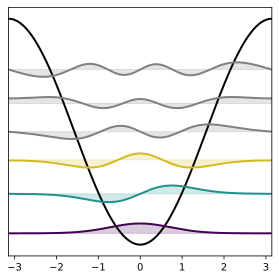

In [51]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(phi_basis_labels ,jp_val, color='black', linewidth='2.0')
ax.plot(phi_basis_labels, np.real(ket0), label=r'$|0\rangle$', color='#440154', linewidth='2.0')
ax.fill_between(phi_basis_labels, -0.9, np.real(ket0), color='#440154', alpha=0.2)
ax.plot(phi_basis_labels, np.imag(ket1), label=r'$|1\rangle$', color='#21918c', linewidth='2.0')
ax.fill_between(phi_basis_labels, -0.55, np.imag(ket1), color='#21918c', alpha=0.2)
ax.plot(phi_basis_labels, np.real(ket2), label=r'$|2\rangle$', color='#d4b920', linewidth='2.0')
ax.fill_between(phi_basis_labels, -0.25, np.real(ket2), color='#d4b920', alpha=0.2)
ax.plot(phi_basis_labels, np.imag(ket3), color='gray', linewidth='2.0')
ax.fill_between(phi_basis_labels, 0, np.imag(ket3), color='gray', alpha=0.2)
ax.plot(phi_basis_labels, np.real(ket4), color='gray', linewidth='2.0')
ax.fill_between(phi_basis_labels, 0.25, np.real(ket4), color='gray', alpha=0.2)
ax.plot(phi_basis_labels, np.imag(ket5), color='gray', linewidth='2.0')
ax.fill_between(phi_basis_labels, 0.55, np.imag(ket5), color='gray', alpha=0.2)
ax.set_yticks([])
ax.set_xlim([-np.pi, np.pi])
fig.tight_layout()
fig.savefig('./paper/fig0_a.eps', format='eps')